<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-времени-продаж-квартир" data-toc-modified-id="Анализ-времени-продаж-квартир-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ времени продаж квартир</a></span></li><li><span><a href="#Нахождение-факторов-влияющих-на-стоимость-квартиры" data-toc-modified-id="Нахождение-факторов-влияющих-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Нахождение факторов влияющих на стоимость квартиры</a></span></li><li><span><a href="#Изучение-предложения-квартир-в-Санкт-Петербурге" data-toc-modified-id="Изучение-предложения-квартир-в-Санкт-Петербурге-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение предложения квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Выделение-сегмента-квартир-в-центре" data-toc-modified-id="Выделение-сегмента-квартир-в-центре-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выделение сегмента квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#Импортируем необходимые библиотеки для дальнейшей работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#Проведем чтение файла данных
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Отобразим первые n строк для ознакомления  с данными
display(df.head(10))
#Получим общую информацию по набору данных
df.info()
#Преобразуем название столбцов к нормальному виду
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
#Посмотрим за какой период предоставлены данные
display(df['first_day_exposition'].min(),df['first_day_exposition'].max())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

'2014-11-27T00:00:00'

'2019-05-03T00:00:00'

### Вывод

 Набор данных предоставлен за период с **2014 по 2019** год,всего в нем предоставлено **23699 записей**, а в некоторых колонках этих данных значительно меньше,что говорит о том, что в наборе данных имеются как пропущенные значения, так и неправильно заполненные, которые необходимо будет обработать на следующем  этапе.

## Предобработка данных

  Прежде чем приступить к предобработке данных, сперва определимся с какими данными нам необходимо работать и уже из этого делать вывод, необходимо лим нам там заполнить пропуски или их уже нереально заполнить в связи с неправильной выгрузкой данных.На предыдущем этапе мы выяснили, что пропуски допущены в :*ceiling_height(высота потолков),floors_total(всего этажей в доме),living_area(жилая площадь),is_apartment(апартаменты),kitchen_area(площадь кухни),balcony(балкон),locality_name(название населенного пункта),airports_nearest(расположенность аэропорта поблизости),cityCenters_nearest(расстояние до центра города),parks_around3000,parks_nearest(расположенност парков по близости),ponds_around3000,ponds_around(расположенность водоемов поблизости),days_exposition(сколько времени было размещено объявление)*.


In [2]:
#Посмотрим на значения в столбце ceiling_height
display(df['ceiling_height'].unique())
#Посмотрим на разброс значений
display(df['ceiling_height'].describe())
#Заполним пропущенные значения средним значением
#print('Пропуски до :', df['ceiling_height'].isna().sum())
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].mean()

#Аналогично поступим и для других столбцов с пропусками
display(df['living_area'].unique())
display(df['living_area'].describe())
#print('Пропуски до :', df['living_area'].isna().sum())
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area'].mean()
#print('Пропуски после :', df['living_area'].isna().sum())
display(df['kitchen_area'].unique())
display(df['kitchen_area'].describe())
#print('Пропуски до :', df['kitchen_area'].isna().sum())
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].mean()
#print('Пропуски после :', df['kitchen_area'].isna().sum())
df.loc[df['balcony'].isna(), 'balcony'] = df['balcony'].replace(np.nan,0)
#print('Пропуски до :', df['floors_total'].isna().sum())
display(df['floors_total'].describe())
df.loc[df['floors_total'].isna(), 'floors_total']= df['floors_total'].median()
#print('Пропуски после :', df['floors_total'].isna().sum())
#print('Пропуски до :', df['days_exposition'].isna().sum())
df.loc[df['days_exposition'].isna(), 'days_exposition']= df['days_exposition'].median()
#print('Пропуски после :', df['days_exposition'].isna().sum())

print('Пропуски до :', df['city_centers_nearest'].isna().sum())


for locality in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality, 'city_centers_nearest'].median()
    df.loc[(df['city_centers_nearest'].isna()) & (df['locality_name'] == locality), 'city_centers_nearest'] = median

df.loc[df['city_centers_nearest'].isna(), 'city_centers_nearest']= df['city_centers_nearest'].median()
print('Пропуски после :', df['city_centers_nearest'].isna().sum())

#Преобразуем данные к нормальному виду в столбце расположенность до центра(выразим в км)
df['city_centers_nearest'] = df['city_centers_nearest'] / 1000

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропуски до : 5519


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Пропуски после : 0


### Преобразование типов данных

In [3]:
#Далее нам необходимо преобразовать некоторые данные, т. е привести их к нормальному виду
#Преобразуем кол-во балконов, ведь в нормальной жизни их не бывает половинчатых?
df['balcony'] = df['balcony'].astype(int)
#Преобразуем апартаменты(по условию задачи у них должен быть тип данных bool) , видимо при выгрузке пошло что-то не так
df['is_apartment'] = df['is_apartment'].astype(bool)
#Преобразуем кол-во этажей, ведь в нормальной жизни их не бывает половинчатых, если это только  не недострой?
df['floors_total'] = df['floors_total'].astype(int)
#А заодно и преобразуем отдаленность от центра города
df['city_centers_nearest'] = df['city_centers_nearest'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    23699 non-null int64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000      

### **Вывод**

На этапе предообработки данных пришлось столкнуться с множеством пропусков в данных, некоторые из них удалось заполнить ,а некоторые не имело особого смысла заполнять, так как по ним не хватает данных (в частности как узнать сколько парков расположено в этой местности, где находится эта локация,или расстояние до центра не зная координат объекта и самого центра, для этого пришлосьбы еще и с картой поработать, но ничего думаю всему свое время). Так же на данном этапе были исправлены некоторые типы даннных, так как в присвоении типов данных, скорее были допущены ошибки операторов, так как был большой объем данных.

## Расчёты и добавление результатов в таблицу

In [4]:
#Подсчитаем цену кв.м для каждой квартиры
df['price_square_meter'] = df['last_price'] / df['total_area']
#добавим день недели продажи квартиры к дате публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
# df['weekday_exposition'] = df['first_day_exposition'].dt.strftime("%A, %d. %B %Y")
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday


#Сделаем категорзацию данных по расположенности квартиры на этажах здания(для этого напишем функцию)
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
#Добавим категоризацию квартир по этажам в таблицу
df['floor_category'] = df.apply(floor_category, axis = 1) 

#Сделаем категорзацию данных по отдаленности от центра города
def centr_category(row):
    if row <= 3: return 'центр'
    if row <6: return 'близко'
    return 'далековато'
#Добавим категоризацию квартир по отдаленности от центра города
df['centr_category'] = df['city_centers_nearest'].apply(centr_category) 

#Посчитаем соотношение жилой и общей площади,отншение площади кухни к общей
df['area_ratio'] = df['living_area'] / df['total_area'] #соотношение жилой площади к общей
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] #соотношение площади кухни к общей площади

### Вывод

На данном этапе были подготовлены дополнительные данные на основе которых будут делаться  и строиться дальнейшие предположения.

## Исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

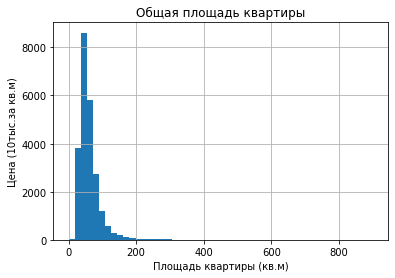

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

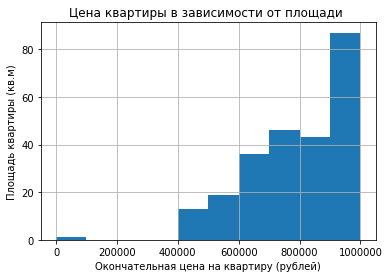

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

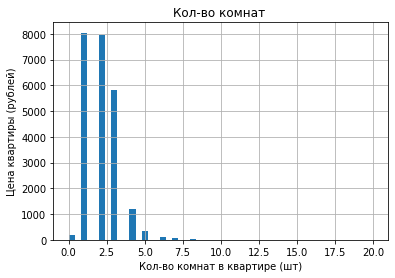

count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

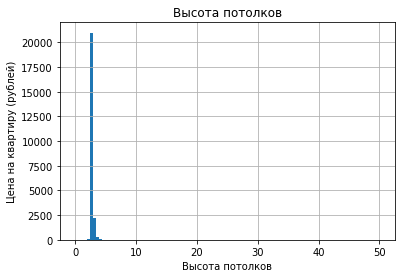

In [5]:
#Посмотрим на следующие параметры [площадь, цена, число комнат, высота потолков]
display(df['total_area'].describe())
#Из полученных данных видим, что в данных нету пропусков, макс. значение 900 кв.м , мин. 12 кв.м, построим гистограмму
x_y_label = df.hist('total_area',bins=50,range=(0,900),sharex=True,sharey=True)
#напишем небольшой цикл, чтобы отрисовать подписи к осям
for ax in x_y_label.flatten():
    ax.set_xlabel('Площадь квартиры (кв.м)')
    ax.set_ylabel('Ценa (10тыс.за кв.м)')
plt.title('Общая площадь квартиры') #Отрисовка названия загаловка гистограммы
plt.show()

#Поступим так же и для других данных
#Построим гистрограмму по цене квартир
display(df['last_price'].describe())
x_y_label = df.hist('last_price',bins=10,range=(0,1000000))

for ax in x_y_label.flatten():
    ax.set_xlabel('Окончательная цена на квартиру (рублей)')
    ax.set_ylabel('Площадь квартиры (кв.м)')
plt.title('Цена квартиры в зависимости от площади ')
plt.show()

#Построим гистограмму по количеству комнат
display(df['rooms'].describe())
x_y_label = df.hist('rooms',bins=50,range=(0,20))

for ax in x_y_label.flatten():
    ax.set_xlabel('Кол-во комнат в квартире (шт)')
    ax.set_ylabel('Цена квартиры (рублей)')
plt.title('Кол-во комнат ')
plt.show()

#Построим гистограмму по высоте потолков
display(df['ceiling_height'].describe())
x_y_label = df.hist('ceiling_height',bins=100,range=(0,50))
for ax in x_y_label.flatten():
    ax.set_xlabel('Высота потолков')
    ax.set_ylabel('Цена на квартиру (рублей)')
plt.title('Высота потолков')
plt.show()

Построив гистрограммы некоторых зависимостей( цены от кол-ва комнат,цены от площади квартиры и тд) мы наблюдаем, что существует некоторая зависимость между данными(есть некоторые пики в разных областях), в дальнейшем надо будет более подробнее взглянуть на эти зависимости, чтобы определить есть ли между ними более плотная зависимость или это так сильно влияют на данные некоторые выбросы или быть можеттак получилось из-за неправильного заполнения пропусков .Если заметишь , сперва сделал подписи к осям своим методом, а потом узрил, что есть и другой способ ...

### Анализ времени продаж квартир

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0


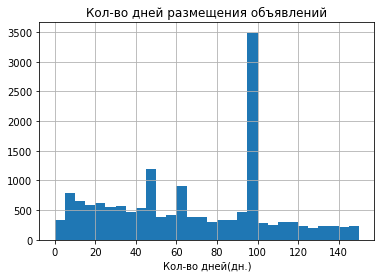

In [6]:
#Проанализиуем данные по времени продажи квартир
display(df['days_exposition'].describe())
#Из полученных данных видим, что в среднем квартиры продаются 180 дней, а максимально продавалась 1580 дней
#Найдем медиану значений 
print(df['days_exposition'].median()) 
#Построим гистограмму значений времени продаж квартир
df.hist('days_exposition',bins=30,range=(0,150))
plt.title('Кол-во дней размещения объявлений')
plt.xlabel('Кол-во дней(дн.)')
plt.show()

На основе полученных данных можно сделать следующий вывод, что обычно квартиры продаются до 180 дней( в пределах среднего значения). Очень быстрыми продажи можно считать тогда, когда они прошли за время меньше, чем медиана(медиана составляет 95 дней),быстрыми продажи будут находиться в интервале между медианой и средним значением продаж(95<t<180), медленные продажи все что продавалось больше 180 дней. так же стоит отметить, что медиана практически в двое меньше среднего значения,что говорит нам о том, что имеется пик значений с очень маленькими результатами.

0.7114646187602852

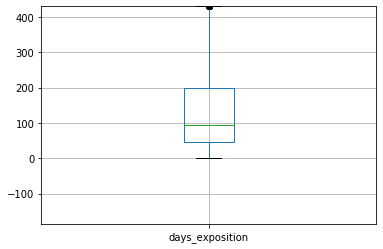

In [7]:
#Построив и изучив гистограмму времени продаж квартир, мы видим, что много значений расположено около 0
#Посмотрим на это более пристально и уберем редкие и выбивающиеся значения(выбросы), построив диаграмму размаха
#Определим границы выбросов
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1 # iqr
# границы интервала наиболее вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr #нижняя граница выбросов и верхняя граница выбросов
plt.ylim(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
df[['days_exposition']].boxplot()
#def qqplot(row):
#    for i in df:
#        q1 = df['i'].quantile(0.25)
#        q3 = df['i'].quantile(0.75)
#        iqr = q3 - q1 # iqr
#        q_max = q3 + 1.5 * iqr
#        plt.ylim(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
#        df[['i']].boxplot()
#    return q_max
#Проведем срез данных, отбросив лишние значения, так называемые выбросы
#Найдем среднее значение времени продажи квартир
days_exposition_mean = df['days_exposition'].mean()
data = df.query('days_exposition <= @days_exposition_mean')

display(len(data) / len(df)) #выбранные данные составляют 71 %, что вполне неплохо для дальнейшего анализа

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

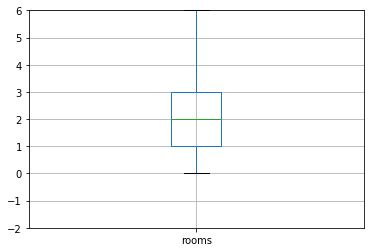

0.6745854255453817

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

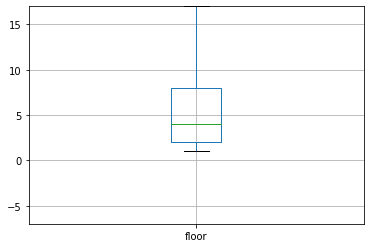

0.6237815941600912

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

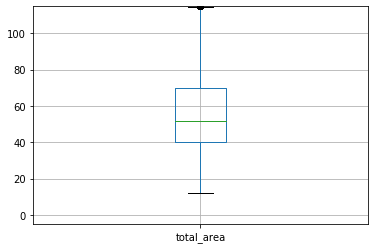

0.6421789948942993

In [8]:
#Определим границы выбросов для цены на квартиру(комнаты)
display(df['rooms'].describe())
q1 = df['rooms'].quantile(0.25)
q3 = df['rooms'].quantile(0.75)
iqr = q3 - q1 # iqr
# границы интервала наиболее вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr #нижняя граница выбросов и верхняя граница выбросов
plt.ylim(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
df[['rooms']].boxplot()
plt.show()
#rooms_mean = df['rooms'].mean()
data = df.query('0 < rooms < 3')
display(len(data) / len(df))  #выбранные данные составляют 67 %, что вполне неплохо для дальнейшего анализа

#Определим границы выбросов для цены на квартиру(этажи)
display(df['floor'].describe())
#display(df['floor'].median())
q1 = df['floor'].quantile(0.25)
q3 = df['floor'].quantile(0.75)
iqr = q3 - q1 # iqr
# границы интервала наиболее вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr #нижняя граница выбросов и верхняя граница выбросов
plt.ylim(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
df[['floor']].boxplot()
plt.show()
floor_mean = df['floor'].mean()
data = df.query('floor <= @floor_mean')
display(len(data) / len(df))  #выбранные данные составляют 62 %, что вполне неплохо для дальнейшего анализа

#Определим границы выбросов для цены на квартиру(Площадь общая)
display(df['total_area'].describe())
#display(df['floor'].median())
q1 = df['total_area'].quantile(0.25)
q3 = df['total_area'].quantile(0.75)
iqr = q3 - q1 # iqr
# границы интервала наиболее вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr #нижняя граница выбросов и верхняя граница выбросов
plt.ylim(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
df[['total_area']].boxplot()
plt.show()
total_area_mean = df['total_area'].mean()
data = df.query('total_area <= @total_area_mean')
display(len(data) / len(df))  #выбранные данные составляют 64 %, что вполне неплохо для дальнейшего анализа

### Нахождение факторов влияющих на стоимость квартиры

(0, 250000)

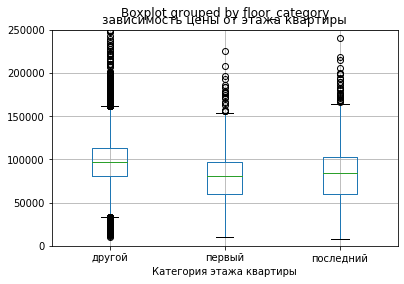

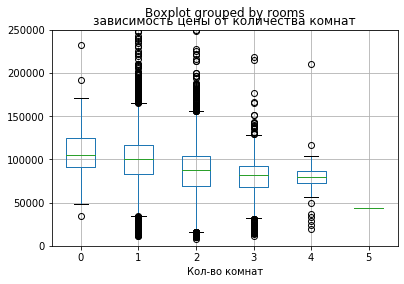

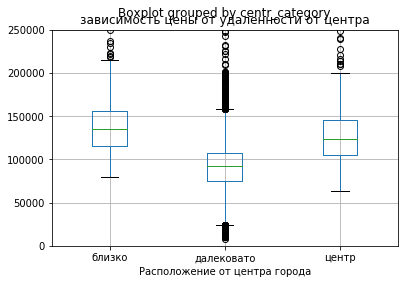

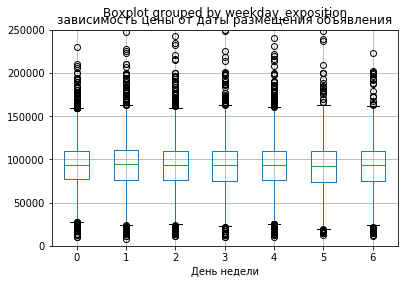

In [9]:
warnings.filterwarnings('ignore')
#Определим от каких факторов зависит стоимость квартиры
#Думаю, что для этого лучше всего подойдет диаграмма размаха, так как на ней отображается 
#где больше всего сосредоточено данных, медианы и где начинаются выбросы.

#Проверим зависимость цены от этажа квартиры
data.boxplot(by='floor_category',column='price_square_meter')
plt.title('зависимость цены от этажа квартиры')
plt.xlabel('Категория этажа квартиры')
plt.ylim(0,250000)
#Проверим зависимость цены от количества комнат
data.boxplot(by='rooms',column='price_square_meter')
plt.title('зависимость цены от количества комнат')
plt.xlabel('Кол-во комнат')
plt.ylim(0,250000)
#Проверим зависимость цены от удаленности от центра
data.boxplot(by='centr_category',column='price_square_meter')
plt.title('зависимость цены от удаленности от центра')
plt.xlabel('Расположение от центра города')
plt.ylim(0,250000)
#Проверим зависимость цены от даты размещения объявления
#df.plot(x='price_square_meter', y='weekday_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
data.boxplot(by='weekday_exposition',column='price_square_meter')
plt.title('зависимость цены от даты размещения объявления')
plt.xlabel('День недели')
plt.ylim(0,250000)

In [10]:
#Помимо построения диаграмм рассеяния, посмотрим зависимость одной величины от другой(посмотрим  на корреляцию)
#Посмотрим зависимость цены от этажа квартиры
print('Корреляция :',data['floor'].corr(data['price_square_meter']))
#Посмотрим зависимость цены от кол-ва комнат
print('Корреляция :',data['rooms'].corr(data['price_square_meter']))
#Посмотрим зависимость цены от этажа квартиры
print('Корреляция :',data['city_centers_nearest'].corr(data['price_square_meter']))

Корреляция : 0.23944201437680931
Корреляция : -0.23747063983117986
Корреляция : -0.21037900169905682


In [14]:
#Выберем 10 населенных пунктов с наибольшим число объявлений, для этого слегка видоизменим названия населенных пунктов
data['locality_name_new'] = data['locality_name']
for repl in ['поселок', 'деревня', 'посёлок', 'городской', 'коттеджный']:
    data['locality_name_new'] = data['locality_name_new'].str.replace(repl, '')

data[['locality_name', 'locality_name_new']].drop_duplicates().reset_index(drop=True)
#Подсчитаем кол-во объявлений по каждому из населенных пунктов
select_city = data.groupby('locality_name_new').agg({'rooms' : 'count',
                                     'price_square_meter' : 'mean'}).sort_values(by='rooms', ascending=False).head(10)
#Найдем макимальное и минимальное значение цены за кв.м в отобранных городах
select_city_max = select_city['price_square_meter'].max()
select_city_min = select_city['price_square_meter'].min()

print(select_city.query('price_square_meter == @select_city_max'))#город с максимальным значением
print(select_city.query('price_square_meter == @select_city_min'))#город с минимальным значением

                   rooms  price_square_meter
locality_name_new                           
Санкт-Петербург     9295       108389.782792
                   rooms  price_square_meter
locality_name_new                           
Гатчина              239        68314.881792


Основываясь на полученных результатах можно сделать следющие выводы :
1) Цена квартиры , практически не зависит от того, на каком этаже расположена квартира(да, квартиры на 1м этаже чуть хуже покупаются, чем квартиры на последнем этаже, но  и не лучше, чем на любом другом этаже)
2) Цена квартиры чуть более сильнее зависит от того, как близко расположена квартира к центру города, чем цена на квартиру удаленная от центра на 6 км.
3) Цена квартиры слабо зависит от количества комнат в квартире
Все это было выявлено с помощью нахождения коэффициента корреляции.Так же были выделены 10 городов с наиболее большим количеством объявлений.


### Изучение предложения квартир в Санкт-Петербурге

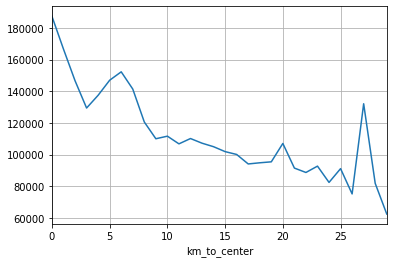

In [12]:
#Сделаем выборку по городу Санкт_петербург
spb_select = df[df.loc[:,'locality_name'] == 'Санкт-Петербург']
#Создадим новый столбец, на основе уже сделанного ранее при предобработке данных, сейчас просто округлим имеющийся столбец
spb_select['km_to_center'] = spb_select['city_centers_nearest'].round()
df['km_to_center'] = df['city_centers_nearest'].round()
#Сгруппируем по средней цене за км и построим график
spb_select_grouped = spb_select.groupby('km_to_center')['price_square_meter'].mean().astype(int)
spb_select_grouped.plot(x='km_to_center',y='price_square_meter', grid=True)

Согласно графика, видим, что чем дальше от центра, тем квартиры стоят дешевле.Примем что центральная часть простирается от 0 до 6 км примерно.

### Выделение сегмента квартир в центре

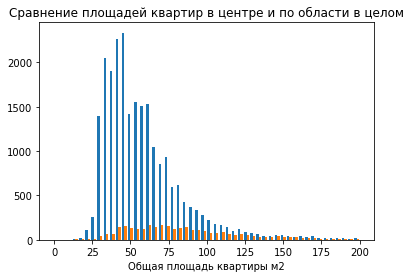

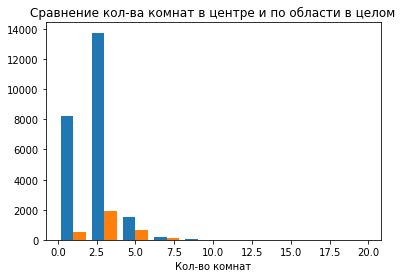

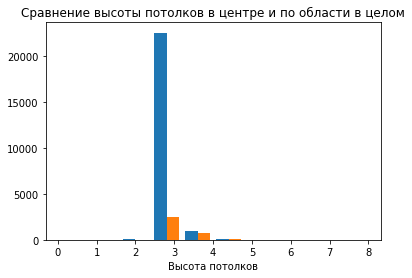

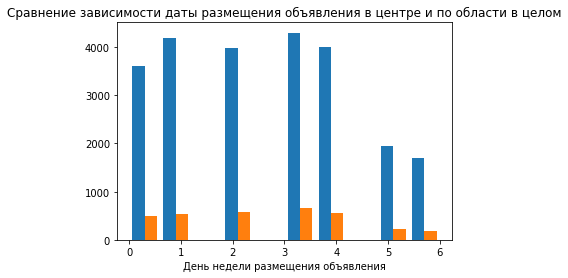

Корреляция цены от числа комнат: -0.012250581740537218
Корреляция цены от этажа: 0.13910930910913005
Корреляция цены от удаленности от центра города: -0.0006166473093770261
Корреляция цены от даты размещения объявления: 0.02728853626960315


In [13]:
#Выделим центральную часть города
spb_select_center = df.query('0 < km_to_center <=6')

#Построим соответствующие гистограммы, чтобы посмотреть на данные по квартирам в центре города
#Общая площадь квартиры
plt.hist([df['total_area'],spb_select_center['total_area']],bins=50,range=(0,200))
plt.title('Сравнение площадей квартир в центре и по области в целом')
plt.xlabel('Общая площадь квартиры м2')
plt.show()
#spb_select_center.hist('total_area', bins=50)      
#spb_select_center.hist('rooms', bins=50)  
#количество комнат
plt.hist([df['rooms'],spb_select_center['rooms']],bins=10,range=(0,20))
plt.title('Сравнение кол-ва комнат в центре и по области в целом')
plt.xlabel('Кол-во комнат')
plt.show()
#высота потолков
#spb_select_center.hist('ceiling_height', bins=10) 
plt.hist([df['ceiling_height'],spb_select_center['ceiling_height']],bins=10,range=(0,8))
plt.title('Сравнение высоты потолков в центре и по области в целом')
plt.xlabel('Высота потолков')
plt.show()

#Дата размещения
#spb_select_center.hist('weekday_exposition', bins=10)
plt.hist([df['weekday_exposition'],spb_select_center['weekday_exposition']],bins=10,range=(0,6))
plt.title('Сравнение зависимости даты размещения объявления в центре и по области в целом')
plt.xlabel('День недели размещения объявления')
plt.show()

#Посмотрим на факторы влияющие на цену квартиры(найдем корреляцию)
print('Корреляция цены от числа комнат:',spb_select_center['price_square_meter'].corr(spb_select_center['rooms']))
print('Корреляция цены от этажа:',spb_select_center['price_square_meter'].corr(spb_select_center['floor']))
print('Корреляция цены от удаленности от центра города:',spb_select_center['price_square_meter'].corr(spb_select_center['km_to_center']))
print('Корреляция цены от даты размещения объявления:',spb_select_center['price_square_meter'].corr(spb_select_center['weekday_exposition']))

Проанализировав полученные данные и графики можно сказать, что зависимость есть, но она не ярко выражена(или не линейна),заключается она в том, что цена зависит на прямую от числа комнат, от того на каком этаже расположена квартира  и наоборот, цена ниже, чем дальше мы будем приобретать квартиру от центра. Эти выводы в принципе совпадают с выводами по всему городу, есть только различия по количеству комнат в квартирах( в центре нет квартир с 19 комнатами). Так же выполнив наложение гистограмм другна друга мы смогли сравнить одни и теже показатели для центра выбранного города и в целом для всех населенных пуктов. Из чего можно сделать вывод,что на гистограмме по высоте потолков для общего объема даных присутствует явный выброс в виде определенного кол-ва квартир с высотой потолков ниже 2-х метров( то есть выбросы присутствуют либо на окраинах города, либо в других населенных пунктах), так же можно заметить равномерность распределения значений для центра выбранного города на всех гистограммах(это может быть выражено небольшим объемом данных).

## Общий вывод

<div class="alert alert-info"><b>
Проделав данную исследовательскую работу,мы определили от каких основных факторов зависит цена квартиры в целом по данным Яндекс.Недвижимость за период с 2014 года по 2019 год. Такими основными факторами стали: расположенность квартиры в дали от центра или же в центре города, на каком этаже расположена квартира(охотнее продаются квартиры ни на первых и последних этажах),количество комнат(чем больше комнат, тем дороже квартира). Думаю в дальнейшем данные параметры помогут нам автоматизировать весь процесс поиска квартиры.
На этапе предобработки данных были выявлены пропуски в наборе данных(высота потолков,общая площадь квартиры, площадь кухни, жилая площадь,длительность размещения объявления,этажность здания). В процессе предобработки данных было исключено около 30% всех данных(где-то чуть больше 30, где-то чуть меньше), что не существенно повлияло на зависимости.
В ходе работы с даными были выялены следующие зависимости: цена от кол-ва комнат(кф  корреляции 0.23747063983117986, что говорит нам о незначительной зависимости друг от друга), цены от удаленности от центра (кф корреляции -0.21037900169905682, "-" говорит нам об обратной зависимости, т.е чем дальше от центра, тем ниже цена), цена от расположенности на этаже ( тут все было примерно одинаково, с той лишь разницей, что квартиры на первом этаже и последнем, чуть меньше стоят, чем все другие квартиры).
На последнем этапе работы было проведено исследование разницы между квартирами в центре города и целым набором данных, в резултате чего было замечено, что в центре не присуствуют 1-к квартиры и высота потолков в квартирах центра города начинается примерно с 2,7 м.</b></div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод